In [1]:
import kwant
import openfermion
from fermionic_systems import *
from spin_lattices import *

C:\Users\Repair\anaconda3\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


## Simple system

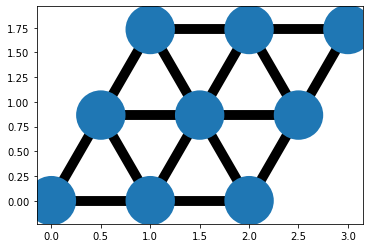

4.0 [0^ 0] +
-1.0 [0^ 1] +
-1.0 [0^ 3] +
-1.0 [1^ 0] +
4.0 [1^ 1] +
-1.0 [1^ 2] +
-1.0 [1^ 3] +
-1.0 [1^ 4] +
-1.0 [2^ 1] +
4.0 [2^ 2] +
-1.0 [2^ 4] +
-1.0 [2^ 5] +
-1.0 [3^ 0] +
-1.0 [3^ 1] +
4.0 [3^ 3] +
-1.0 [3^ 4] +
-1.0 [3^ 6] +
-1.0 [4^ 1] +
-1.0 [4^ 2] +
-1.0 [4^ 3] +
4.0 [4^ 4] +
-1.0 [4^ 5] +
-1.0 [4^ 6] +
-1.0 [4^ 7] +
-1.0 [5^ 2] +
-1.0 [5^ 4] +
4.0 [5^ 5] +
-1.0 [5^ 7] +
-1.0 [5^ 8] +
-1.0 [6^ 3] +
-1.0 [6^ 4] +
4.0 [6^ 6] +
-1.0 [6^ 7] +
-1.0 [7^ 4] +
-1.0 [7^ 5] +
-1.0 [7^ 6] +
4.0 [7^ 7] +
-1.0 [7^ 8] +
-1.0 [8^ 5] +
-1.0 [8^ 7] +
4.0 [8^ 8]


In [2]:
a = 1.
L = 3
t = 1.

syst = kwant.Builder()
lat = kwant.lattice.triangular(a)
syst[(lat(x, y) for x in range(L) for y in range(L))] = 4 * t
syst[lat.neighbors()] = -t

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_FermionOperator(syst)
print(ham)

## System with spin

$$H=−\frac{\hbar^2}{2m}(\partial^2_x+\partial^2_y)−i\alpha(\partial_x\sigma_y−\partial_y\sigma_x)+E_Z\sigma_z$$

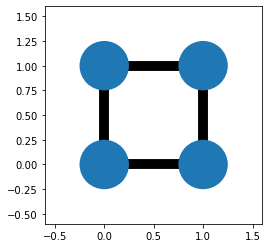

4.08 [0^ 0] +
(-1+0j) [0^ 2] +
0.25j [0^ 3] +
(-1+0j) [0^ 4] +
(-0.25+0j) [0^ 5] +
3.92 [1^ 1] +
0.25j [1^ 2] +
(-1+0j) [1^ 3] +
(0.25+0j) [1^ 4] +
(-1+0j) [1^ 5] +
(-1+0j) [2^ 0] +
-0.25j [2^ 1] +
4.08 [2^ 2] +
(-1+0j) [2^ 6] +
(-0.25+0j) [2^ 7] +
-0.25j [3^ 0] +
(-1+0j) [3^ 1] +
3.92 [3^ 3] +
(0.25+0j) [3^ 6] +
(-1+0j) [3^ 7] +
(-1+0j) [4^ 0] +
(0.25+0j) [4^ 1] +
4.08 [4^ 4] +
(-1+0j) [4^ 6] +
0.25j [4^ 7] +
(-0.25+0j) [5^ 0] +
(-1+0j) [5^ 1] +
3.92 [5^ 5] +
0.25j [5^ 6] +
(-1+0j) [5^ 7] +
(-1+0j) [6^ 2] +
(0.25+0j) [6^ 3] +
(-1+0j) [6^ 4] +
-0.25j [6^ 5] +
4.08 [6^ 6] +
(-0.25+0j) [7^ 2] +
(-1+0j) [7^ 3] +
-0.25j [7^ 4] +
(-1+0j) [7^ 5] +
3.92 [7^ 7]


In [3]:
t=1.0
alpha=0.5
e_z=0.08
L = 2



# Start with an empty tight-binding system and a single square lattice.
# `a` is the lattice constant (by default set to 1 for simplicity).
lat = kwant.lattice.square()

syst = kwant.Builder()

#### Define the scattering region. ####
syst[(lat(x, y) for x in range(L) for y in range(L))] = \
    4 * t * sigma_0 + e_z * sigma_z
# hoppings in x-direction
syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = \
    -t * sigma_0 + 1j * alpha * sigma_y / 2
# hoppings in y-directions
syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = \
    -t * sigma_0 - 1j * alpha * sigma_x / 2

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_FermionOperator(syst)
print(ham)

## Multiatomic lattice

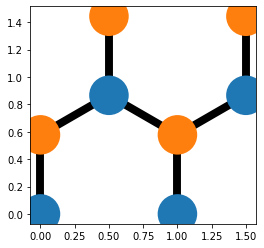

1.0 [0^ 0] +
-1.0 [0^ 4] +
1.0 [1^ 1] +
-1.0 [1^ 4] +
-1.0 [1^ 5] +
-1.0 [1^ 6] +
1.0 [2^ 2] +
-1.0 [2^ 6] +
1.0 [3^ 3] +
-1.0 [3^ 6] +
-1.0 [3^ 7] +
-1.0 [4^ 0] +
-1.0 [4^ 1] +
1.0 [4^ 4] +
-1.0 [5^ 1] +
1.0 [5^ 5] +
-1.0 [6^ 1] +
-1.0 [6^ 2] +
-1.0 [6^ 3] +
1.0 [6^ 6] +
-1.0 [7^ 3] +
1.0 [7^ 7]


In [4]:
L = 2
t = 1

lat = kwant.lattice.honeycomb()
syst = kwant.Builder()

for sublat in lat.sublattices:
    syst[(sublat(x,y) for x in range(L) for y in range(L))] = t
syst[lat.neighbors()] = -t

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_FermionOperator(syst)
print(ham)

Spin lattice:

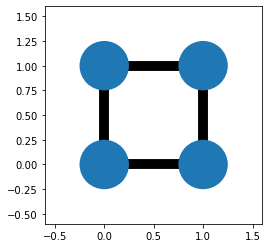

(1+0j) [X0 X2] +
(1+0j) [Y0 Y1] +
(1+0j) [Z0] +
(1+0j) [X1 X3] +
(1+0j) [Z1] +
(1+0j) [Y2 Y3] +
(1+0j) [Z2] +
(1+0j) [Z3]


In [5]:
lat = kwant.lattice.square()

syst = kwant.Builder()

L = 2


syst[(lat(x, y) for x in range(L) for y in range(L))] = sigma_z
syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = np.kron(sigma_x, sigma_x)
syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = np.kron(sigma_y, sigma_y)

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_QubitOperator(syst)
print(ham)

## Kitaev honeycomb

### Single ring

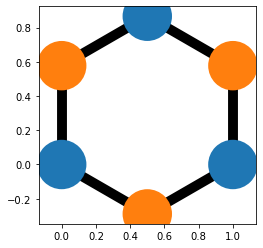

(-1+0j) [Y0 Y3] +
(-1+0j) [Z0 Z4] +
(-1+0j) [X1 X3] +
(-1+0j) [Z1 Z5] +
(-1+0j) [X2 X4] +
(-1+0j) [Y2 Y5]


In [6]:
J = 1

lat = kwant.lattice.honeycomb()
syst = kwant.Builder()

syst[lat.sublattices[0](0,0)] = 0*sigma_0
syst[lat.sublattices[0](0,1)] = 0*sigma_0
syst[lat.sublattices[0](1,0)] = 0*sigma_0
syst[lat.sublattices[1](0,0)] = 0*sigma_0
syst[lat.sublattices[1](1,-1)] = 0*sigma_0
syst[lat.sublattices[1](1,0)] = 0*sigma_0


    
for hopping, pauli_matrix in zip(lat.neighbors(), [sigma_x, sigma_y, sigma_z]):
    syst[hopping] = -J * np.kron(pauli_matrix, pauli_matrix)
    
syst = syst.finalized()
kwant.plot(syst)

ham = system_to_QubitOperator(syst)
print(ham)

### Large system

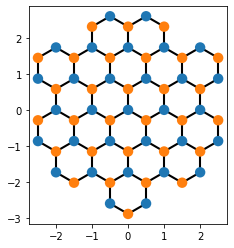

(-1+0j) [Y0 Y31] +
(-1+0j) [Z0 Z33] +
(-1+0j) [X1 X31] +
(-1+0j) [Z1 Z34] +
(-1+0j) [Y2 Y32] +
(-1+0j) [Z2 Z36] +
(-1+0j) [X3 X32] +
(-1+0j) [Y3 Y33] +
(-1+0j) [Z3 Z37] +
(-1+0j) [X4 X33] +
(-1+0j) [Y4 Y34] +
(-1+0j) [Z4 Z38] +
(-1+0j) [X5 X34] +
(-1+0j) [Y5 Y35] +
(-1+0j) [Z5 Z39] +
(-1+0j) [X6 X35] +
(-1+0j) [Z6 Z40] +
(-1+0j) [Y7 Y36] +
(-1+0j) [Z7 Z41] +
(-1+0j) [X8 X36] +
(-1+0j) [Y8 Y37] +
(-1+0j) [Z8 Z42] +
(-1+0j) [X9 X37] +
(-1+0j) [Y9 Y38] +
(-1+0j) [Z9 Z43] +
(-1+0j) [X10 X38] +
(-1+0j) [Y10 Y39] +
(-1+0j) [Z10 Z44] +
(-1+0j) [X11 X39] +
(-1+0j) [Y11 Y40] +
(-1+0j) [Z11 Z45] +
(-1+0j) [X12 X40] +
(-1+0j) [Z12 Z46] +
(-1+0j) [X13 X41] +
(-1+0j) [Y13 Y42] +
(-1+0j) [Z13 Z47] +
(-1+0j) [X14 X42] +
(-1+0j) [Y14 Y43] +
(-1+0j) [Z14 Z48] +
(-1+0j) [X15 X43] +
(-1+0j) [Y15 Y44] +
(-1+0j) [Z15 Z49] +
(-1+0j) [X16 X44] +
(-1+0j) [Y16 Y45] +
(-1+0j) [Z16 Z50] +
(-1+0j) [X17 X45] +
(-1+0j) [Y17 Y46] +
(-1+0j) [Z17 Z51] +
(-1+0j) [Y18 Y47] +
(-1+0j) [Z18 Z52] +
(-1+0j) [X19 X47] +
(-1+0

In [7]:
r = 3
J = 1


def circle(pos):
        x, y = pos
        return x ** 2 + y ** 2 < r ** 2

lat = kwant.lattice.honeycomb()
syst = kwant.Builder()

syst[lat.shape(circle, (0,0))] = 0*sigma_0
    
for hopping, pauli_matrix in zip(lat.neighbors(), [sigma_x, sigma_y, sigma_z]):
    syst[hopping] = -J * np.kron(pauli_matrix, pauli_matrix)
    
syst = syst.finalized()
kwant.plot(syst)

ham = system_to_QubitOperator(syst)
print(ham)